# <center> MATH&ML-10. Кластеризация и техники понижения размерности. Часть I

In [ ]:
# Импорты
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import cluster
from sklearn import metrics
from sklearn import mixture
import matplotlib.pyplot as plt
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

### Юнит 4. K-Means и EM-алгоритм: практика

In [219]:
snsdata = pd.read_csv('data/snsdata.zip')
snsdata

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


gradyear — год выпуска;

gender — пол;

age — возраст;

friends — число друзей в социальной сети;

basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [220]:
#Задание 4.1
snsdata = snsdata.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
snsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   basketball    30000 non-null  int64
 1   football      30000 non-null  int64
 2   soccer        30000 non-null  int64
 3   softball      30000 non-null  int64
 4   volleyball    30000 non-null  int64
 5   swimming      30000 non-null  int64
 6   cheerleading  30000 non-null  int64
 7   baseball      30000 non-null  int64
 8   tennis        30000 non-null  int64
 9   sports        30000 non-null  int64
 10  cute          30000 non-null  int64
 11  sex           30000 non-null  int64
 12  sexy          30000 non-null  int64
 13  hot           30000 non-null  int64
 14  kissed        30000 non-null  int64
 15  dance         30000 non-null  int64
 16  band          30000 non-null  int64
 17  marching      30000 non-null  int64
 18  music         30000 non-null  int64
 19  rock          30000 non-n

In [221]:
#Задание 4.2
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(snsdata)
round(X_norm[0][0], 2)

-0.33

In [222]:
#Задание 4.3
kmeans_model = cluster.KMeans(random_state=42, n_clusters=9)
kmeans_model.fit(X_norm)
round(kmeans_model.inertia_, 2)

856276.7

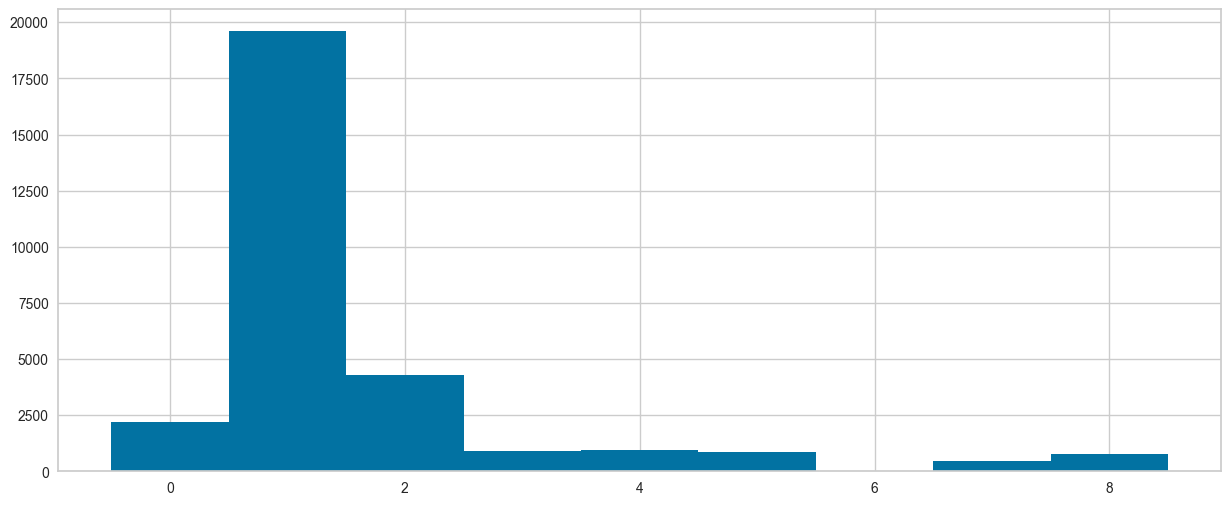

Людей, относящихся к наиболее распространенному кластеру: 19599
Людей, относящихся к наименее распространенному кластеру: 1


In [223]:
#Задание 4.4
cluster_counts = Counter(kmeans_model.labels_)

# Сортируем по номерам кластеров
clusters = sorted(cluster_counts.keys())
counts = [cluster_counts[cluster] for cluster in clusters]
counts_greatest_cluster = cluster_counts[1]
counts_least_cluster = cluster_counts[6]

plt.figure(figsize=(15, 6))
plt.bar(clusters, counts, width=1, linewidth=0.7)

plt.show()

print('Людей, относящихся к наиболее распространенному кластеру:', counts_greatest_cluster)
print('Людей, относящихся к наименее распространенному кластеру:', counts_least_cluster)

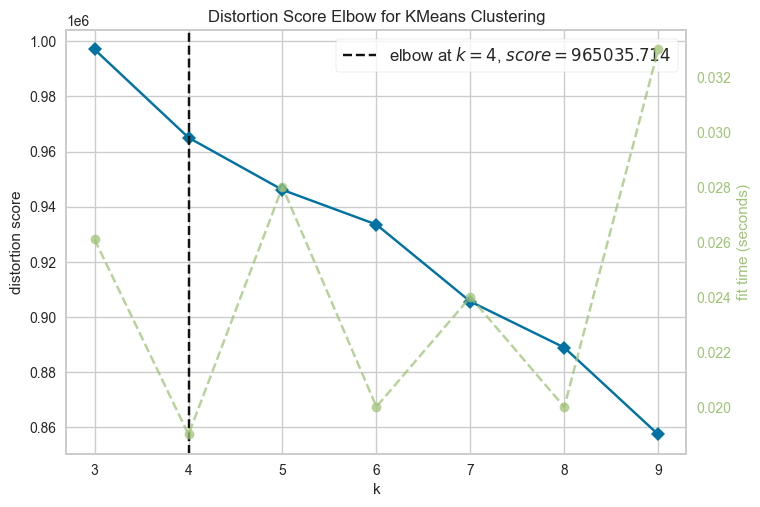

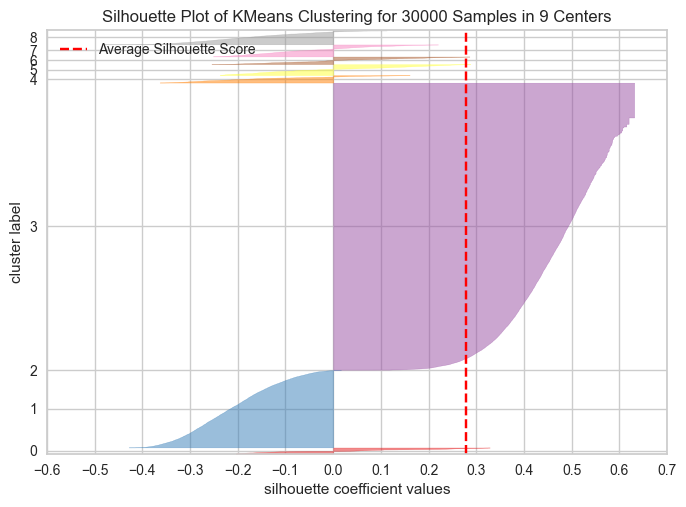

Коэффициенты силуэта для разного количества кластеров (3-9):
 [0.32 0.31 0.31 0.21 0.26 0.27 0.25]


In [224]:
#Задание 4.5
kmeans_model_optimal = cluster.KMeans()
visualizer_kev = KElbowVisualizer(kmeans_model_optimal, k=(3,10)).fit(X_norm)
visualizer_kev.show()

visualizer_sv = SilhouetteVisualizer(kmeans_model_optimal, k=(3,10)).fit(X_norm)
visualizer_sv.show()

def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(3, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))

print('Коэффициенты силуэта для разного количества кластеров (3-9):\n', np.round(silhouette, 2))

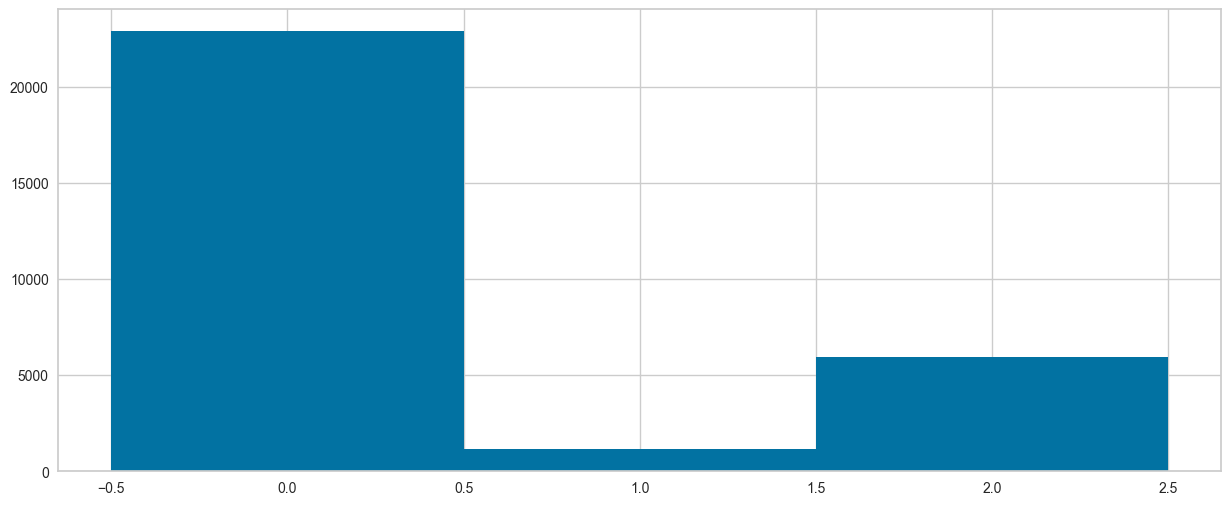

Людей, относящихся к наиболее распространенному кластеру: 22900
Людей, относящихся к наименее распространенному кластеру: 1134


In [225]:
kmeans_model_optimal = cluster.KMeans(random_state=42, n_clusters=3)
kmeans_model_optimal.fit_transform(X_norm)

cluster_counts = Counter(kmeans_model_optimal.labels_)

# Сортируем по номерам кластеров
clusters = sorted(cluster_counts.keys())
counts = [cluster_counts[cluster] for cluster in clusters]
counts_greatest_cluster = cluster_counts[0]
counts_least_cluster = cluster_counts[1]

plt.figure(figsize=(15, 6))
plt.bar(clusters, counts, width=1, linewidth=0.7)

plt.show()

print('Людей, относящихся к наиболее распространенному кластеру:', counts_greatest_cluster)
print('Людей, относящихся к наименее распространенному кластеру:', counts_least_cluster)

Text(0.5, 1.0, 'Среднее количество упоминаний слова в кластере 3')

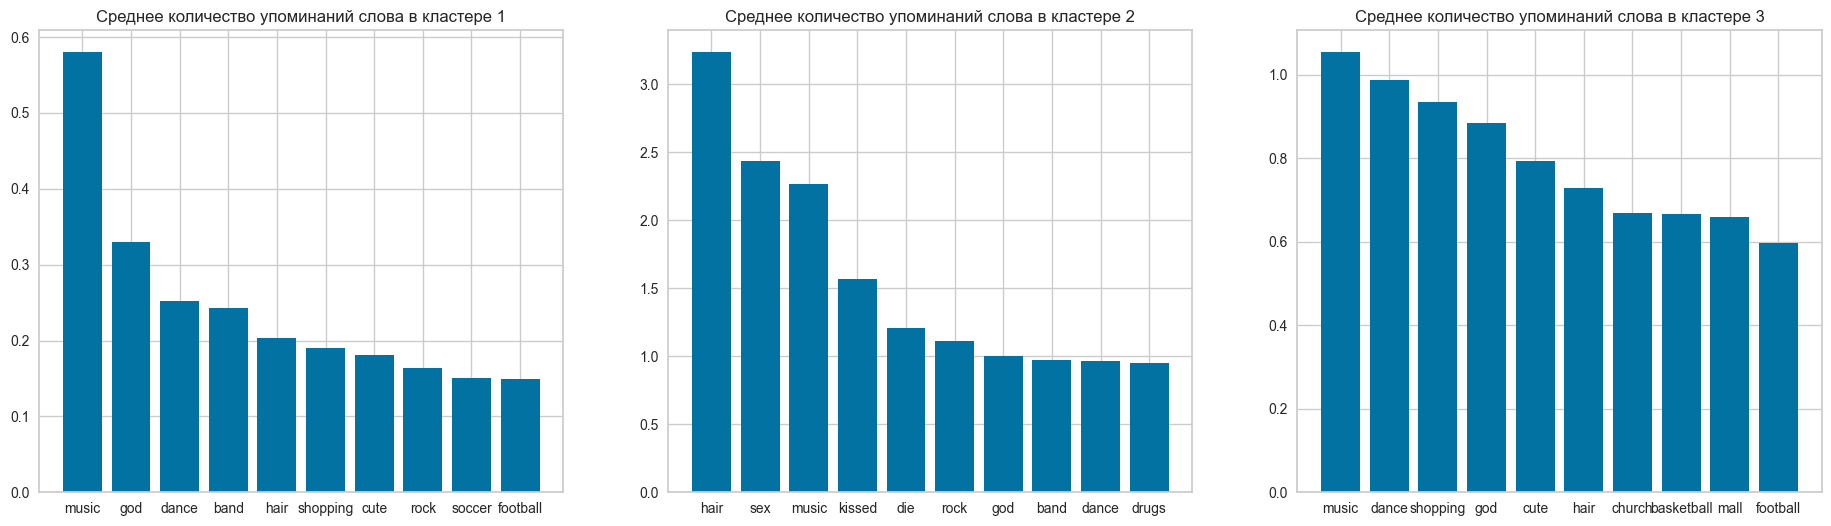

In [226]:
#задание 4.6
snsdata_with_cluster = snsdata.copy()
snsdata_with_cluster['cluster'] = kmeans_model_optimal.predict(X_norm)
# display(snsdata_with_cluster.head())

#Сортируем по кластерам
data_cluster_1 = snsdata_with_cluster[snsdata_with_cluster['cluster']==0].drop('cluster', axis=1).mean().sort_values(ascending=False)
data_cluster_2 = snsdata_with_cluster[snsdata_with_cluster['cluster']==1].drop('cluster', axis=1).mean().sort_values(ascending=False)
data_cluster_3 = snsdata_with_cluster[snsdata_with_cluster['cluster']==2].drop('cluster', axis=1).mean().sort_values(ascending=False)

# Графики побольше
# plt.figure(figsize=(20, 7))
# plt.bar(data_cluster_1.index[:25], data_cluster_1[:25])
# plt.title('Среднее количество упоминаний слова в кластере 1')
# plt.show()

# plt.figure(figsize=(20, 7))
# plt.bar(data_cluster_2.index[:25], data_cluster_2[:25])
# plt.title('Среднее количество упоминаний слова в кластере 2')
# plt.show()

# plt.figure(figsize=(20, 7))
# plt.bar(data_cluster_3.index[:25], data_cluster_3[:25])
# plt.title('Среднее количество упоминаний слова в кластере 3')
# plt.show()

plt.figure(figsize=(23, 6))
plt.subplot(1, 3, 1)
plt.bar(data_cluster_1.index[:10], data_cluster_1[:10])
plt.title('Среднее количество упоминаний слова в кластере 1')

plt.subplot(1, 3, 2)
plt.bar(data_cluster_2.index[:10], data_cluster_2[:10])
plt.title('Среднее количество упоминаний слова в кластере 2')

plt.subplot(1, 3, 3)
plt.bar(data_cluster_3.index[:10], data_cluster_3[:10])
plt.title('Среднее количество упоминаний слова в кластере 3')

In [ ]:
#Задание 4.7
snsdata_with_EM_cluster = snsdata.copy()

EM_model = mixture.GaussianMixture(random_state=42, n_components=3)
snsdata_with_EM_cluster['cluster'] = EM_model.fit_predict(X_norm)

data_cluster_1_EM = snsdata_with_cluster[snsdata_with_cluster['cluster']==0]
data_cluster_2_EM = snsdata_with_cluster[snsdata_with_cluster['cluster']==1]
data_cluster_3_EM = snsdata_with_cluster[snsdata_with_cluster['cluster']==2]

print('Количество подростков в 1 кластере:', data_cluster_1_EM['cluster'].count())
print('Количество подростков во 2 кластере:', data_cluster_2_EM['cluster'].count())
print('Количество подростков в 3 кластере:', data_cluster_3_EM['cluster'].count())

Количество подростков в 1 кластере: 22900
Количество подростков во 2 кластере: 1134
Количество подростков в 3 кластере: 5966


In [228]:
# Эталон
model = mixture.GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X_norm)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([20670,  2874,  6456], dtype=int64))

Text(0.5, 1.0, 'Среднее количество упоминаний слова в кластере 3')

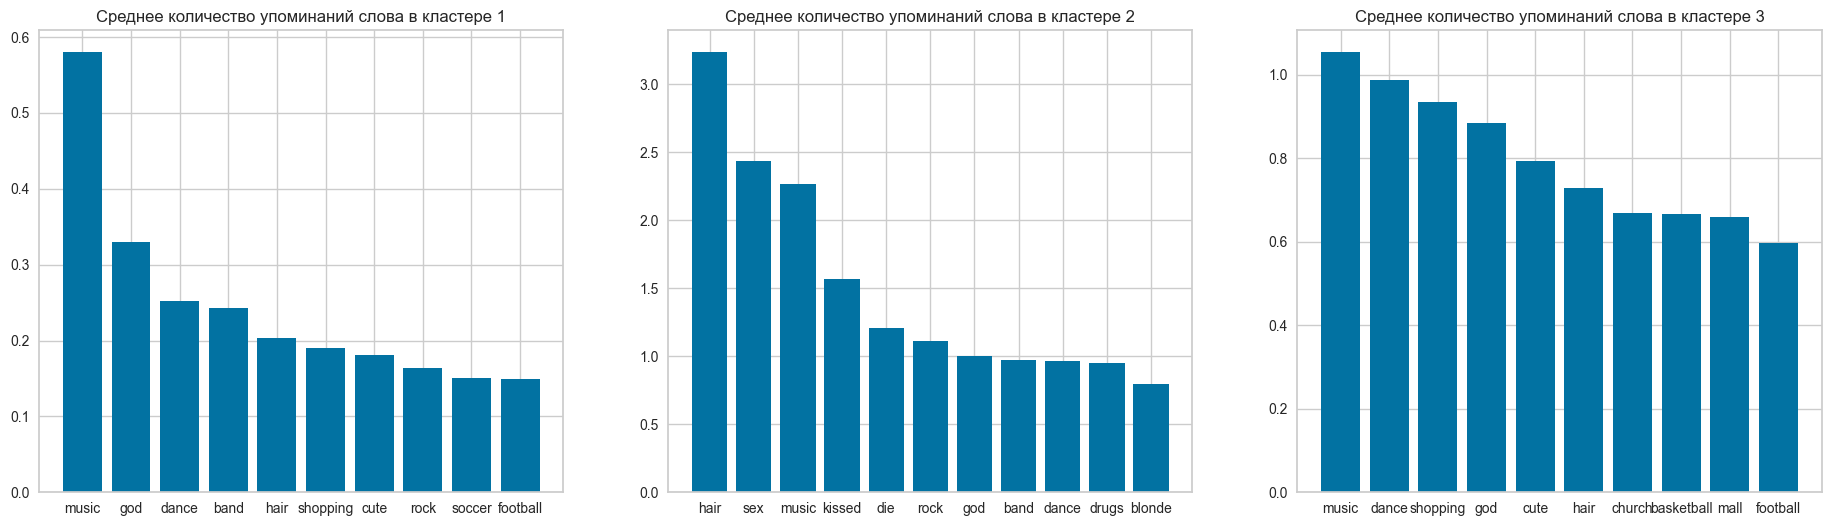

In [232]:
#Задание 4.8

data_cluster_1_EM = snsdata_with_cluster[snsdata_with_cluster['cluster']==0].drop('cluster', axis=1).mean().sort_values(ascending=False)
data_cluster_2_EM = snsdata_with_cluster[snsdata_with_cluster['cluster']==1].drop('cluster', axis=1).mean().sort_values(ascending=False)
data_cluster_3_EM = snsdata_with_cluster[snsdata_with_cluster['cluster']==2].drop('cluster', axis=1).mean().sort_values(ascending=False)

plt.figure(figsize=(23, 6))
plt.subplot(1, 3, 1)
plt.bar(data_cluster_1_EM.index[:10], data_cluster_1_EM[:10])
plt.title('Среднее количество упоминаний слова в кластере 1')

plt.subplot(1, 3, 2)
plt.bar(data_cluster_2_EM.index[:11], data_cluster_2_EM[:11])
plt.title('Среднее количество упоминаний слова в кластере 2')

plt.subplot(1, 3, 3)
plt.bar(data_cluster_3_EM.index[:10], data_cluster_3_EM[:10])
plt.title('Среднее количество упоминаний слова в кластере 3')